In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# '\s+' tells pandas to use any spaces as the delimiter instead of ,
original_data = pd.read_csv("../data/delivery.2023.03.12.dat", delimiter='\s+')

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1080286/4163960611.py:2: SyntaxWarning: invalid escape sequence '\s'
  original_data = pd.read_csv("../data/delivery.2023.03.12.dat", delimiter='\s+')


In [3]:
feature_col_names = ['F1', 'F2', 'F3', 'F4',
       'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12']
X_df = original_data[feature_col_names]

In [4]:
# LabelEncoder will transform the class names to numeric values
le = LabelEncoder()
le.fit(original_data['Tag'])
print("Original Classes", le.classes_)
print("Mapping", le.transform(le.classes_))
le.classes_ = np.array(['ex', 'eq', 'mis'])
print("Updated Classes", le.classes_)
print("Mapping", le.transform(le.classes_))
y = le.transform(original_data['Tag'])
y_cnts = np.unique(y, return_counts=True)[1]
print(y_cnts)

Original Classes ['eq' 'ex' 'mis']
Mapping [0 1 2]
Updated Classes ['ex' 'eq' 'mis']
Mapping [0 1 2]
[279 814 228]


In [5]:
train_inds, test_inds = train_test_split(np.arange(X_df.shape[0]), test_size=0.2, shuffle=True, random_state=42)

In [6]:
X_df = X_df.to_numpy()
X_train = X_df[train_inds]
X_test = X_df[test_inds]
y_train = y[train_inds]
y_test = y[test_inds]

In [7]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=36851234)
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('svc', LinearSVC(dual=True, max_iter=1000))
])
param_grid = {'svc__C': np.logspace(-2, 2, num=5)}
model = GridSearchCV(pipeline, param_grid, cv=rskf)
model.fit(X_train, y_train)

/uufs/chpc.utah.edu/common/home/u1072028/software/pkg/miniconda3/envs/ut_classifier/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/uufs/chpc.utah.edu/common/home/u1072028/software/pkg/miniconda3/envs/ut_classifier/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/uufs/chpc.utah.edu/common/home/u1072028/software/pkg/miniconda3/envs/ut_classifier/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/uufs/chpc.utah.edu/common/home/u1072028/software/pkg/miniconda3/envs/ut_classifier/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/uufs/chpc.utah.edu/common/home/

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=36851234),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', LinearSVC(dual=True))]),
             param_grid={'svc__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

# Train Results

In [8]:
y_pred_train = model.predict(X_train)

In [9]:
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

[[211   1   3]
 [  0 649   2]
 [  7   2 181]]


In [10]:
f1_score(y_train, y_pred_train, average='macro')

0.9778415006203675

# Testing results

In [11]:
y_pred_test = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[ 63   0   1]
 [  0 162   1]
 [  0   0  38]]


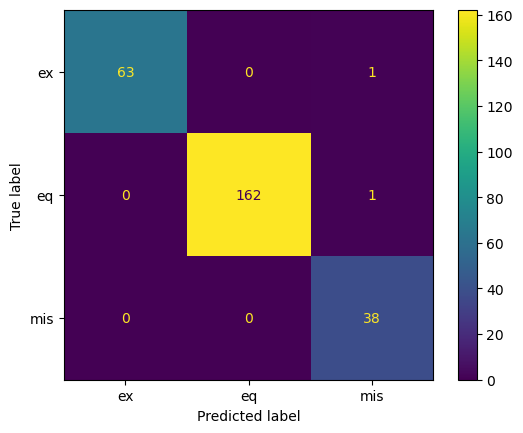

In [12]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, 
                       display_labels=le.classes_)
display.plot()